In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

### Read in the data

In [2]:
DATA_RAW = pd.read_csv('../source data/new data/Merged_V15_with_ASSESS.csv')
mask = ((DATA_RAW['ONS_CENSUS_2011'].str[0] == 'E') + (DATA_RAW['ONS_CENSUS_2011'].str[0] == 'W'))
DATA_ENG_WAL_RAW = DATA_RAW[mask]
DATA_ENG_WAL = DATA_ENG_WAL_RAW[DATA_ENG_WAL_RAW['ONS_CENSUS_2011'].notnull()]

# "test" subset — all records with known ONS codes
data_eng = DATA_ENG_WAL.copy()

/home/adam/anaconda3/lib/python3.4/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


### Tidy up

I don't like punctuation in column names. Also they shouldn't start with a number

In [3]:
to_replace = (':', '/', ';', ',')

for col in data_eng.columns:
    if col not in ['LA_POPULATION', 'ONS_CENSUS_2011']:
        newname = col
        if newname[0].isdigit():
            newname = 'p_{0}'.format(newname)
        newname = newname.replace(' ', '_')
        for item in to_replace:
            newname = newname.replace(item, '')

        data_eng = data_eng.rename(columns={col: newname})

Define relevant columns (done by hand):

In [4]:
target_columns = ['Modifed_Total', 'ASS_Modifed_Total']
unempl_columns = ['unemployed_age_16_and_over', 'unemployment_age_16_to_24', 'unemployment_age_25_to_34', 'never_worked_age_16_and_over', 'never_worked_age_16_to_24', 'never_worked_age_25_to_34']
ethno_columns = ['All_categories_Ethnic_group_of_HRP', 'White_Total', 'White_EnglishWelshScottishNorthern_IrishBritish', 'White_Irish', 'White_Gypsy_or_Irish_Traveller', 'White_Other_White', 'Mixedmultiple_ethnic_group_Total', 'Mixedmultiple_ethnic_group_White_and_Black_Caribbean', 'Mixedmultiple_ethnic_group_White_and_Black_African', 'Mixedmultiple_ethnic_group_White_and_Asian', 'Mixedmultiple_ethnic_group_Other_Mixed', 'AsianAsian_British_Total', 'AsianAsian_British_Indian', 'AsianAsian_British_Pakistani', 'AsianAsian_British_Bangladeshi', 'AsianAsian_British_Chinese', 'AsianAsian_British_Other_Asian', 'BlackAfricanCaribbeanBlack_British_Total', 'BlackAfricanCaribbeanBlack_British_African', 'BlackAfricanCaribbeanBlack_British_Caribbean', 'BlackAfricanCaribbeanBlack_British_Other_Black', 'Other_ethnic_group_Total', 'Other_ethnic_group_Arab', 'Other_ethnic_group_Any_other_ethnic_group']
edu_columns = ['edu_all', 'edu_no_qualifications', 'edu_level_1', 'edu_level_2', 'edu_apprenticeship', 'edu_level_3', 'edu_level_4_and_above', 'edu_other_qualifications']

All analysis should be done on normalised data, e.g. numbers divided by LA_POPULATION.

In [5]:
columns_to_normalise = target_columns + unempl_columns + ethno_columns + edu_columns
for column in columns_to_normalise:
    data_eng[column] = data_eng[column]/data_eng['LA_POPULATION']

In [6]:
data_eng.head(5)

,ONS_CENSUS_2011,Local.Authority,LA.type,LA_POPULATION,LA_AREA_HEC,COUNTY_POPULATION,CALCUATED_RATIO,LA_16_17,LA_16_24,LA_18_24,...,Other_ethnic_group_Arab,Other_ethnic_group_Any_other_ethnic_group,edu_all,edu_no_qualifications,edu_level_1,edu_level_2,edu_apprenticeship,edu_level_3,edu_level_4_and_above,edu_other_qualifications
0,E06000001,Hartlepool,Unitary,92028,9386.11,Durham,NaN,NaN,NaN,NaN,...,0.000304,0.000239,0.806581,0.247294,0.109282,0.130308,0.044291,0.100795,0.141946,0.032664
1,E06000002,Middlesbrough,Unitary,138412,5387.47,North Yorkshire,0.231313,NaN,NaN,NaN,...,0.002312,0.001589,0.797684,0.238433,0.108755,0.122034,0.035214,0.105063,0.147906,0.040278
2,E06000003,Redcar and Cleveland,Unitary,135177,24489.51,North Yorkshire,0.225906,NaN,NaN,NaN,...,0.000141,0.000237,0.821227,0.233398,0.110574,0.134823,0.047094,0.107799,0.155448,0.032091
3,E06000004,Stockton-on-Tees,NaN,191610,20393.06,NaN,NaN,NaN,NaN,NaN,...,0.000449,0.000741,0.806341,0.191681,0.112024,0.135948,0.042195,0.109347,0.183967,0.031178
4,E06000005,Darlington,Unitary,105564,19747.51,Durham,NaN,NaN,NaN,NaN,...,0.000436,0.000464,0.808581,0.200627,0.108418,0.128529,0.041207,0.103094,0.191770,0.034936


### P1E data

Read them in and merge with the rest.

In [7]:
p1e = pd.read_csv('../source data/new data/p1e.csv')

p1e_columns = []
for year in (2012, 2013, 2014):
    for i in range(4):
        p1e_columns.append('p_{0}_{1}'.format(year, i+1))
        p1e_columns.append('p_{0}_{1}_all'.format(year, i+1))
        
p1e_columns = p1e_columns[2:]

data_eng = data_eng.merge(p1e[['ONS_CENSUS_2011'] + p1e_columns], on='ONS_CENSUS_2011', how='left')
for column in p1e_columns:
    data_eng[column] = data_eng[column]/data_eng['LA_POPULATION']

### Shelter data

If you want, you can import data from Shelter folder. You can then add them to predictor variables with:
```python
for col in to_join:
    predictors.append(to_join[col][1])
```

In [8]:
test = data_eng.copy()

# the structure of this dictionary is as follows: {filename: [[column_name_in_csv], desired_column_name]}
to_join = {'Average weekly council rents': [['13/14'], 'avg_council_rents'],
           'Council homes sold through Right To Buy': [['13/14'], 'right_to_buy'],
           'Housing Benefit claimants - all': [['housing_benefit'], 'housing_benefit']}

for metric in to_join:
    temp = pd.read_csv('../source data/new data/Shelter_Data/{0}.csv'.format(metric))
    temp = temp[['ONS'] + to_join[metric][0]].dropna().rename(columns={'ONS': 'ONS_CENSUS_2011'})
    test = test.merge(temp, how='left', on = 'ONS_CENSUS_2011')
    
    rename_cols = {to_join[metric][0][0]: to_join[metric][1]}
    test = test.rename(columns=rename_cols)

#which columns should be normalised?
columns_to_normalise_new = ['right_to_buy', 'housing_benefit']
for column in columns_to_normalise_new:
    test[column] = test[column].astype(float)/test['LA_POPULATION']

Define predictors

In [9]:
predictors = unempl_columns + ethno_columns + edu_columns
# only using one column from p1e data (total homeless from 2014.3), the rest is patchy
predictors.append('p_2014_3_all')
predictors.append('IMD_SCORE')
#for col in to_join:
#    predictors.append(to_join[col][1])
    
pd.set_option('display.max_columns', None) # show all columns

# make a subset where all predictors and "presented" (target) != NaN
test_filled = test.dropna(subset=predictors, how='any')

Add the "training" subset, i.e. where we know "presented" numbers.

In [10]:
train_filled = test_filled.dropna(subset=['Modifed_Total'])

Explore cross-correlations:

In [11]:
test_filled[predictors].corr()

,unemployed_age_16_and_over,unemployment_age_16_to_24,unemployment_age_25_to_34,never_worked_age_16_and_over,never_worked_age_16_to_24,never_worked_age_25_to_34,All_categories_Ethnic_group_of_HRP,White_Total,White_EnglishWelshScottishNorthern_IrishBritish,White_Irish,White_Gypsy_or_Irish_Traveller,White_Other_White,Mixedmultiple_ethnic_group_Total,Mixedmultiple_ethnic_group_White_and_Black_Caribbean,Mixedmultiple_ethnic_group_White_and_Black_African,Mixedmultiple_ethnic_group_White_and_Asian,Mixedmultiple_ethnic_group_Other_Mixed,AsianAsian_British_Total,AsianAsian_British_Indian,AsianAsian_British_Pakistani,AsianAsian_British_Bangladeshi,AsianAsian_British_Chinese,AsianAsian_British_Other_Asian,BlackAfricanCaribbeanBlack_British_Total,BlackAfricanCaribbeanBlack_British_African,BlackAfricanCaribbeanBlack_British_Caribbean,BlackAfricanCaribbeanBlack_British_Other_Black,Other_ethnic_group_Total,Other_ethnic_group_Arab,Other_ethnic_group_Any_other_ethnic_group,edu_all,edu_no_qualifications,edu_level_1,edu_level_2,edu_apprenticeship,edu_level_3,edu_level_4_and_above,edu_other_qualifications,p_2014_3_all,IMD_SCORE
unemployed_age_16_and_over,1.000000,0.340419,0.163697,0.286293,0.278199,0.159282,0.311020,0.245394,0.279193,-0.282286,-0.173206,-0.255061,-0.148524,-0.011580,-0.138836,-0.224106,-0.223091,-0.114451,-0.096289,0.000360,0.008013,-0.123948,-0.240303,-0.172423,-0.173688,-0.157802,-0.156763,-0.079315,-0.022197,-0.121376,0.394471,0.659863,0.133272,0.134195,0.245901,0.283711,-0.407895,-0.135706,-0.148928,0.348838
unemployment_age_16_to_24,0.340419,1.000000,0.755961,0.780590,0.910996,0.692723,-0.229272,-0.491404,-0.504407,0.359450,-0.145235,0.351715,0.544411,0.502440,0.504749,0.503115,0.453870,0.487075,0.349440,0.334025,0.289343,0.558280,0.395890,0.397035,0.405229,0.353700,0.372633,0.439752,0.390386,0.427798,-0.035079,-0.020231,-0.395984,-0.608542,-0.460505,0.509646,0.111271,0.402118,0.295565,0.386371
unemployment_age_25_to_34,0.163697,0.755961,1.000000,0.939617,0.879774,0.958135,-0.288363,-0.736812,-0.763597,0.541908,-0.142642,0.553406,0.746009,0.646714,0.755280,0.645406,0.673097,0.726246,0.489195,0.568447,0.487850,0.622521,0.609686,0.691440,0.693548,0.629713,0.650111,0.647718,0.521885,0.678828,-0.361094,0.067133,-0.314797,-0.691375,-0.620492,-0.090821,0.034540,0.730062,0.531052,0.485719
never_worked_age_16_and_over,0.286293,0.780590,0.939617,1.000000,0.942864,0.968057,-0.323144,-0.755410,-0.765020,0.537358,-0.160068,0.503005,0.695696,0.604898,0.702156,0.614959,0.616791,0.766602,0.556007,0.583672,0.490670,0.601199,0.628358,0.657865,0.646088,0.614795,0.619581,0.672925,0.552625,0.695680,-0.310771,0.071490,-0.403855,-0.700954,-0.618186,-0.058486,0.074868,0.687937,0.458592,0.463336
never_worked_age_16_to_24,0.278199,0.910996,0.879774,0.942864,1.000000,0.870612,-0.336903,-0.690209,-0.699229,0.502594,-0.146211,0.458135,0.655418,0.582784,0.629336,0.599236,0.567800,0.683320,0.510897,0.488604,0.400450,0.619110,0.565483,0.569392,0.568099,0.524384,0.527759,0.596185,0.496979,0.609580,-0.243041,0.001965,-0.426037,-0.694618,-0.595446,0.168700,0.118471,0.567184,0.400074,0.420826
never_worked_age_25_to_34,0.159282,0.692723,0.958135,0.968057,0.870612,1.000000,-0.373029,-0.809235,-0.813647,0.549403,-0.150208,0.521341,0.708421,0.609383,0.732588,0.616952,0.633492,0.810326,0.563296,0.661809,0.541909,0.593411,0.655900,0.706523,0.702687,0.653368,0.654512,0.666722,0.536901,0.699015,-0.399692,0.019379,-0.383894,-0.707551,-0.628336,-0.160972,0.084600,0.750921,0.507103,0.431500
All_categories_Ethnic_group_of_HRP,0.311020,-0.229272,-0.288363,-0.323144,-0.336903,-0.373029,1.000000,0.719627,0.570015,-0.160189,-0.109567,0.060971,-0.107316,-0.180573,-0.097934,-0.052910,-0.017839,-0.499309,-0.516305,-0.444287,-0.170550,0.086195,-0.357490,-0.299046,-0.301198,-0.290013,-0.218374,-0.068258,0.044577,-0.162857,0.725808,0.172472,-0.016684,0.145244,0.271225,0.057028,0.102416,-0.329254,-0.051808,0.015546
White_Total,0.245394,-0.491404,-0.736812,-0.755410,-0.690209,-0.80

Specifically, let's see correlation with the target variable:

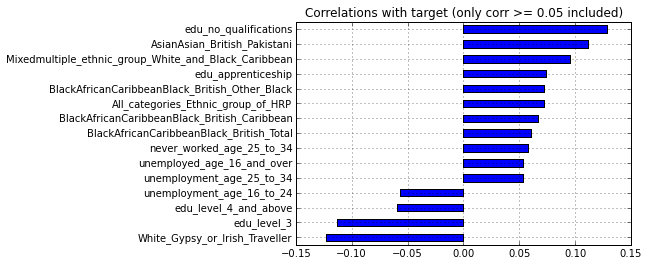

In [12]:
correlation_with_target = test_filled[predictors + ['Modifed_Total']].corr()['Modifed_Total'].order()
correlation_with_target[ np.abs(correlation_with_target) > 0.05][:-1].plot(kind='barh', title='Correlations with target (only corr >= 0.05 included)')

### Linear regression model

In the first approximation, I'm putting all census data as predictors:

In [13]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="Modifed_Total ~ {0}".format(' + '.join(predictors)), data=train_filled).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Modifed_Total   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                 -0.097
Method:                 Least Squares   F-statistic:                    0.6343
Date:                Tue, 28 Jul 2015   Prob (F-statistic):              0.932
Time:                        22:40:59   Log-Likelihood:                 706.84
No. Observations:                 138   AIC:                            -1346.
Df Residuals:                     104   BIC:                            -1246.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------------------
Intercept                                               -0.0168      0.019     -0.901      0.370        -0.054     0.020
unemployed_age_16_and_over                              -0.0023      0.013     -0.182      0.856        -0.027     0.023
unemployment_age_16_to_24                               -0.0385      0.072     -0.538      0.592        -0.181     0.104
unemployment_age_25_to_34                                0.0884      0.118      0.748      0.456        -0.146     0.323
never_worked_age_16_and_over                             0.0281      0.084      0.336      0.737        -0.138     0.194
never_worked_age_16_to_24                                0.0272      0.129      0.210      0.834        -0.229     0.284
never_worked_age_25_to_34                               -0.1540      0.398     -0.387      0.700        -0.944     0.636
All_categories_Ethnic_group_of_HRP                      -0.0777      0.060     -1.302      0.196        -0.196     0.041
White_Total                                              0.0409      0.112      0.365      0.716        -0.181     0.263
White_EnglishWelshScottishNorthern_IrishBritish          0.0409      0.122      0.335      0.739        -0.202     0.283
White_Irish                                             -0.0368      0.151     -0.244      0.808        -0.337     0.263
White_Gypsy_or_Irish_Traveller                          -0.0812      0.457     -0.178      0.859        -0.988     0.826
White_Other_White                                        0.1181      0.142      0.829      0.409        -0.164     0.400
Mixedmultiple_ethnic_group_Total                        -0.4424      0.231     -1.912      0.059        -0.901     0.016
Mixedmultiple_ethnic_group_White_and_Black_Caribbean     1.1996      0.546      2.195      0.030         0.116     2.283
Mixedmultiple_ethnic_group_White_and_Black_African      -1.9980      1.280     -1.560      0.122        -4.537     0.541
Mixedmultiple_ethnic_group_White_and_Asian              -0.1078      0.974     -0.111      0.912        -2.039     1.824
Mixedmultiple_ethnic_group_Other_Mixed                   0.4638      1.141      0.407      0.685        -1.799     2.727
AsianAsian_British_Total                                 0.0526      0.073      0.718      0.474        -0.093     0.198
AsianAsian_British_Indian                                0.0266      0.071      0.377      0.707        -0.113     0.167
AsianAsian_British_Pakistani                             0.0709      0.067      1.055      0.294        -0.062     0.204
AsianAsian_British_Bangladeshi                           0.0456      0.267      0.171      0.865        -0.484     0.575
AsianAsian_British_Chinese                              -0

How many predictors did we use?

In [14]:
print(len(predictors))

40


The model looks rubbish, which should not be a suprise after seeing correlations. Let's try with predictors with correlation >= 0.05:

In [15]:
predictors_limited = correlation_with_target[np.abs(correlation_with_target) > 0.05][:-1].index
model2 = sm.ols(formula="Modifed_Total ~ {0}".format(' + '.join(predictors_limited)), data=train_filled).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Modifed_Total   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.8106
Date:                Tue, 28 Jul 2015   Prob (F-statistic):              0.664
Time:                        22:40:59   Log-Likelihood:                 700.74
No. Observations:                 138   AIC:                            -1369.
Df Residuals:                     122   BIC:                            -1323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------------------
Intercept                                               -0.0037      0.005     -0.802      0.424        -0.013     0.005
White_Gypsy_or_Irish_Traveller                          -0.2642      0.517     -0.511      0.610        -1.287     0.759
edu_level_3                                              0.0066      0.030      0.221      0.825        -0.053     0.066
edu_level_4_and_above                                    0.0115      0.008      1.470      0.144        -0.004     0.027
unemployment_age_16_to_24                               -0.0251      0.030     -0.835      0.405        -0.085     0.034
unemployment_age_25_to_34                                0.0823      0.080      1.027      0.307        -0.076     0.241
unemployed_age_16_and_over                               0.0016      0.008      0.212      0.832        -0.013     0.017
never_worked_age_25_to_34                               -0.1364      0.185     -0.737      0.462        -0.503     0.230
BlackAfricanCaribbeanBlack_British_Total                 0.0232      0.092      0.253      0.801        -0.159     0.205
BlackAfricanCaribbeanBlack_British_Caribbean            -0.0863      0.160     -0.540      0.590        -0.403     0.230
All_categories_Ethnic_group_of_HRP                      -0.0090      0.011     -0.795      0.428        -0.031     0.013
BlackAfricanCaribbeanBlack_British_Other_Black           0.1080      0.387      0.279      0.781        -0.659     0.875
edu_apprenticeship                                       0.0517      0.033      1.560      0.121        -0.014     0.117
Mixedmultiple_ethnic_group_White_and_Black_Caribbean     0.2665      0.306      0.870      0.386        -0.340     0.873
AsianAsian_British_Pakistani                             0.0346      0.043      0.805      0.423        -0.051     0.120
edu_no_qualifications                                    0.0162      0.013      1.217      0.226        -0.010     0.043
==============================================================================
Omnibus:                      162.539   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5772.968
Skew:                           4.242   Prob(JB):                         0.00
Kurtosis:                      33.529   Cond. No.                     4.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We cannot compare the above R^2 with that of the baseline model (0.4), because here we are predicting normalised target and in the baseline we predicted absolute numbers. To make a comparison, predictions here have to be multiplied by LA populations:

In [16]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error
clf = linear_model.LinearRegression()
clf.fit(train_filled[predictors_limited], train_filled['Modifed_Total'])

pred = clf.predict(train_filled[predictors_limited])
def print_metrics(target, prediction):
    print('R^2 = {0}'.format(r2_score(target, prediction)))
    print('Mean error = {0}'.format(mean_absolute_error(target, prediction)))
    print('Median error = {0}'.format(median_absolute_error(target, prediction)))
    
print_metrics(train_filled['Modifed_Total']*train_filled['LA_POPULATION'], pred*train_filled['LA_POPULATION'])

R^2 = 0.528794965110819
Mean error = 140.6964667896123
Median error = 94.6847704051178


### Conclusion

Even though R^2 is higher, this is due to overfitting, which you can verify by cross validation:

In [17]:
from sklearn import cross_validation

scores = cross_validation.cross_val_score(clf, train_filled[predictors_limited], train_filled['Modifed_Total'], scoring='r2', cv=5)
print("R^2 in 5-fold cross-validation:", scores)

R^2 in 5-fold cross-validation: [ -0.01942216  -0.1367313   -0.758526    -0.22434805 -10.27184727]


Unless I have done something stupid, I'd conclude that there are no linear correlations here. We should investigate distributions of census data more and/or try nonlinear models.